In [96]:
from matplotlib import pyplot as plt
from astropy.io import fits
import glob
import numpy as np
from statistics import median

In [52]:
lst_01 = glob.glob("F150LP/01/*.fits")
lst_03 = glob.glob("F150LP/03/*.fits")
lst_150 = glob.glob("F150LP/*/*.fits")
lst_165 = glob.glob("F165LP/*/*.fits")

In [84]:
def get_center(inputfilename):
    file = fits.open(inputfilename)
    #WCS info from header
    CRVAL1 = file[1].header['CRVAL1']
    CRVAL2 = file[1].header['CRVAL2']
    CRPIX1 = file[1].header['CRPIX1']
    CRPIX2 = file[1].header['CRPIX2']
    CD1_1 = file[1].header['CD1_1']
    CD1_2 = file[1].header['CD1_2']
    CD2_1 = file[1].header['CD2_1']
    CD2_2 = file[1].header['CD2_2']
    
    A = np.array([[CD1_1, CD1_2], [CD2_1, CD2_2]])
    A_inv = np.linalg.inv(A)
    B = np.array([[CRVAL1],[CRVAL2]])
    r0 = np.array([[CRPIX1],[CRPIX2]])
    
    def coo_pixtosky(r):
        return np.matmul(A, r-r0) + B
    
    def coo_skytopix(r_sky):
        return np.matmul(A_inv, r_sky - B) + r0
    
    #Target location info
    RA_TARG = file[0].header['RA_TARG'] 
    DEC_TARG = file[0].header['DEC_TARG']
    r_sky_TARG = np.array([[RA_TARG], [DEC_TARG]])
    X_TARG, Y_TARG = int(coo_skytopix(r_sky_TARG)[0]), int(coo_skytopix(r_sky_TARG)[1])
    
    data = file[1].data
    
    s = 100
    max_i = 0
    max_j = 0
    maxval = 0
    for i in range(Y_TARG-s, Y_TARG+s+1):
        for j in range(X_TARG-s, X_TARG+s+1):
            if data[i][j] > maxval:
                maxval = data[i][j]
                max_i = i
                max_j = j 
    r = 50
    total_flux = 0
    i_integral = 0
    j_integral = 0
    for i in range(max_i-r, max_i+r+1):
        for j in range(max_j-r, max_j+r+1):
            total_flux += data[i][j]
            i_integral += i*data[i][j]
            j_integral += j*data[i][j]
    
    i_center = i_integral/total_flux
    j_center = j_integral/total_flux
    
    X_center = j_center +1
    Y_center = i_center +1
    r_center = np.array([[X_center], [Y_center]])
    

    return int(X_center), int(Y_center)



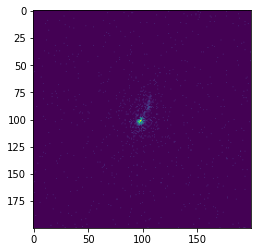

In [89]:
file = fits.open(lst_150[0])
data = file[1].data[10:1014, 10: 1014]
center = get_center(lst_150[0])
subtract_data = file[1].data[center[1] - 100 : center[1]+100, center[0] - 100: center[0] + 100 ]
plt.imshow(subtract_data)

In [90]:
temp = []
cps = []
for item in lst_150+ lst_165:
    file = fits.open(item)
    temp.append((file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2 )
    exp_t = file[0].header['EXPTIME']
    
    sample_data = file[1].data[10:1014, 10: 1014]
    s1 = sum(sum(sample_data))
    
    center = find_center(lst_150[0])
    subtract_data = file[1].data[center[1] - 50 : center[1]+50, center[0] - 50: center[0] + 50 ]
    s2 = sum(sum(subtract_data))
    
    cps.append(((s1 - s2)/exp_t)/( len(sample_data[i]) * len(sample_data) ))


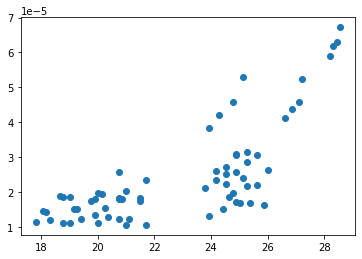

In [91]:
plt.plot(temp, cps, 'o')

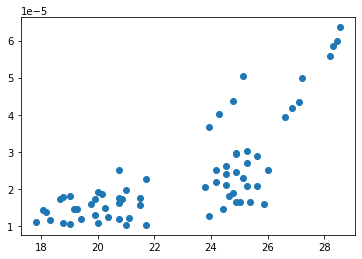

In [93]:
temp = []
cps = []
for item in lst_150+ lst_165:
    file = fits.open(item)
    temp.append((file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2 )
    exp_t = file[0].header['EXPTIME']
    
    sample_data = file[1].data[10:1014, 10: 1014]
    s1 = sum(sum(sample_data))
    
    center = find_center(lst_150[0])
    subtract_data = file[1].data[center[1] - 100 : center[1]+100, center[0] - 100: center[0] + 100 ]
    s2 = sum(sum(subtract_data))
    
    cps.append(((s1 - s2)/exp_t)/( len(sample_data[i]) * len(sample_data) ))

plt.plot(temp, cps, 'o')

In [82]:
temp = []
cps = []
for item in lst_150+ lst_165:
    file = fits.open(item)
    temp.append((file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2 )
    exp_t = file[0].header['EXPTIME']
    
    sample_data = file[1].data[:273, 756:]
    s1 = sum(sum(sample_data))
    
    #center = find_center(lst_150[0])
    #subtract_data = file[1].data[center[1] - 100 : center[1]+100, center[0] - 100: center[0] + 100 ]
    #s2 = sum(sum(subtract_data))
    
    cps.append((s1/exp_t)/( len(sample_data[i]) * len(sample_data) ))



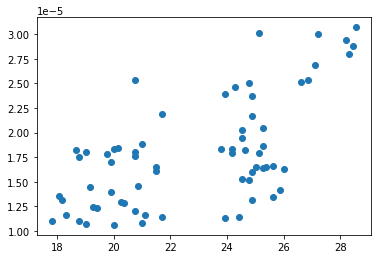

In [83]:
plt.plot(temp, cps, 'o')

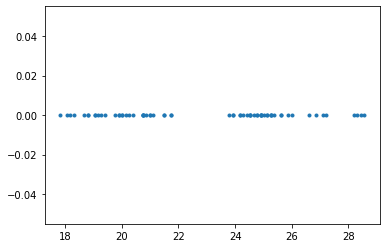

In [99]:
temp = []
med = []
for item in lst_150+ lst_165:
    file = fits.open(item)
    temp.append((file[1].header['MDECODT1'] + file[1].header['MDECODT2']) /2 )
    exp_t = file[0].header['EXPTIME']
    
    data = file[1].data
    
    med.append(median(file[1].data.flatten()))
plt.plot(temp, med, '.')

In [109]:
data = file[1].data[:273, 756:].flatten()
median(data)

0.0